In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
data["Owner"].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [8]:
print(data["Fuel_Type"].value_counts())
print(data["Seller_Type"].value_counts())
print(data["Transmission"].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


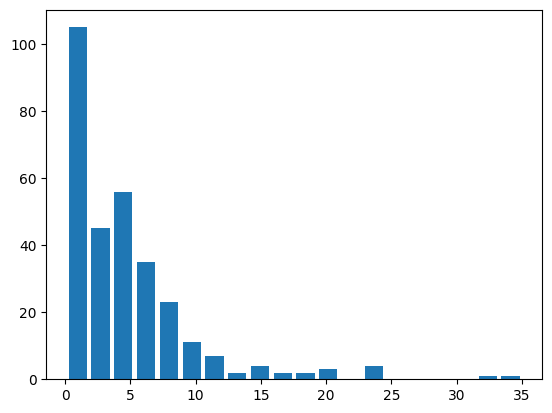

In [9]:
plt.hist(data=data , x="Selling_Price" , bins =20 ,histtype='bar', rwidth=0.8);

<Axes: xlabel='Fuel_Type', ylabel='count'>

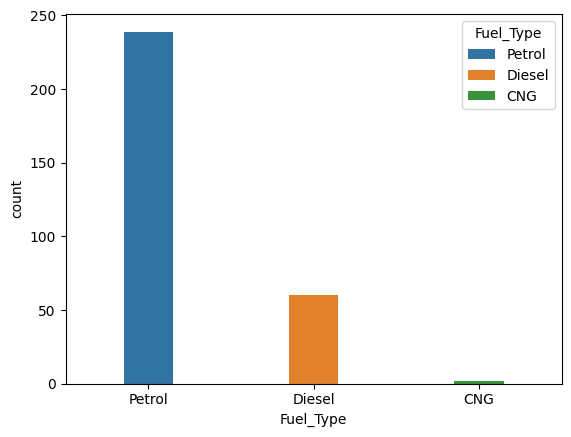

In [10]:
sns.countplot(data =data ,x="Fuel_Type",hue = "Fuel_Type",width=0.3 , legend=True)

<Axes: xlabel='Seller_Type', ylabel='count'>

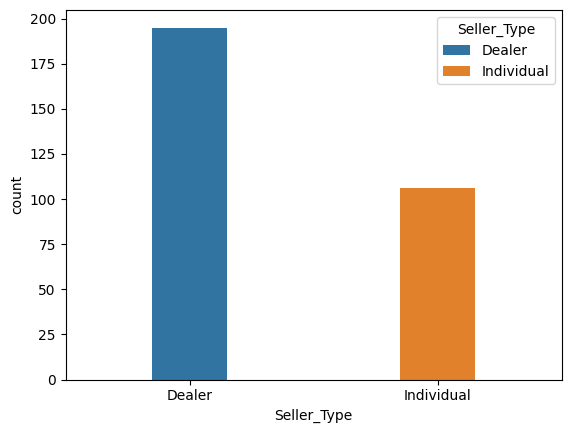

In [11]:
sns.countplot(data= data , x = "Seller_Type" , width=0.3 , hue = "Seller_Type", legend=True)

In [12]:
data['this_year'] = 2024
data['the_age_of_car'] = data["this_year"] - data["Year"]
data.drop(columns = ["this_year" , "Year"], inplace = True)

In [13]:
car_count_by_age = data.groupby('the_age_of_car').count()['Car_Name']

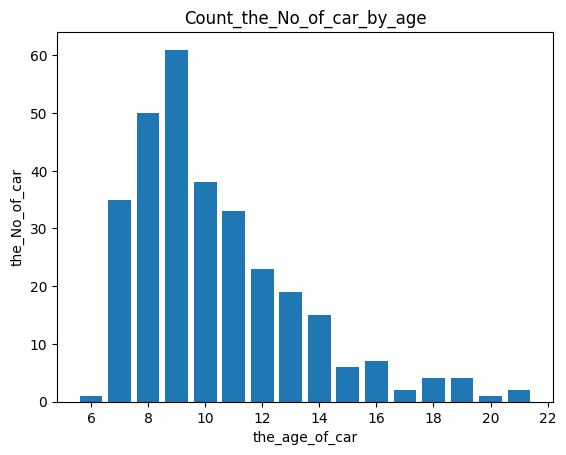

In [14]:
plt.bar(x=car_count_by_age.index, height=car_count_by_age.values)
plt.xlabel("the_age_of_car")
plt.ylabel("the_No_of_car")
plt.title("Count_the_No_of_car_by_age");

<Axes: xlabel='Transmission', ylabel='count'>

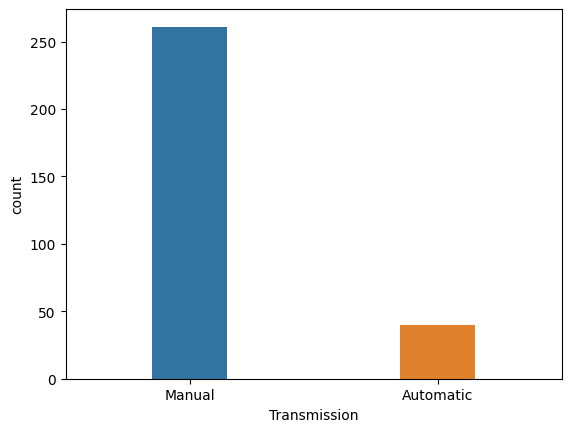

In [15]:
sns.countplot(data = data , x="Transmission", hue= "Transmission" ,width=0.3 )

<Axes: xlabel='the_age_of_car', ylabel='Kms_Driven'>

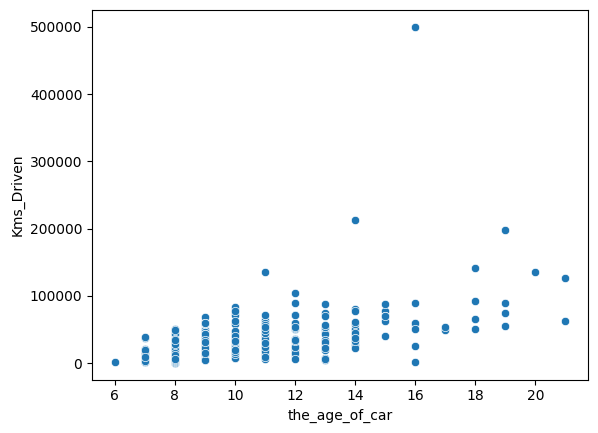

In [16]:
sns.scatterplot(data=data ,y="Kms_Driven" , x="the_age_of_car")

<Axes: xlabel='the_age_of_car', ylabel='Present_Price'>

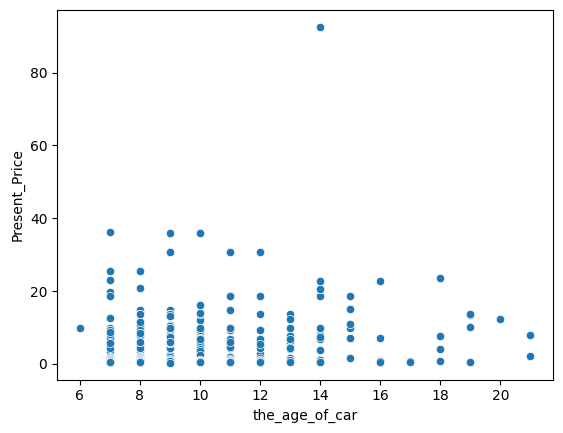

In [17]:
sns.scatterplot(data =data , y="Present_Price" , x="the_age_of_car")

In [18]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,the_age_of_car
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [19]:
data.describe().round(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,the_age_of_car
count,301.00,301.00,301.00,301.00,301.00
mean,4.66,7.63,36947.21,0.04,10.37
std,5.08,8.64,38886.88,0.25,2.89
min,0.10,0.32,500.00,0.00,6.00
25%,0.90,1.20,15000.00,0.00,8.00
50%,3.60,6.40,32000.00,0.00,10.00
75%,6.00,9.90,48767.00,0.00,12.00
max,35.00,92.60,500000.00,3.00,21.00


In [20]:
label_encoder = LabelEncoder()
data["Fuel_Type_encoded"] = label_encoder.fit_transform(data["Fuel_Type"])
data["Seller_Type_encoded"] = label_encoder.fit_transform(data["Seller_Type"])
data["Transmission_encoded"] = label_encoder.fit_transform(data["Transmission"])
data["Owner_encoded"] = label_encoder.fit_transform(data["Owner"])


data.drop("Fuel_Type",axis = 1, inplace=True)
data.drop("Seller_Type",axis = 1, inplace=True)
data.drop("Transmission",axis = 1, inplace=True)
data.drop("Owner" , axis = 1 , inplace = True)

In [21]:
data_1 = data.copy()
data_1.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,the_age_of_car,Fuel_Type_encoded,Seller_Type_encoded,Transmission_encoded,Owner_encoded
0,ritz,3.35,5.59,27000,10,2,0,1,0
1,sx4,4.75,9.54,43000,11,1,0,1,0
2,ciaz,7.25,9.85,6900,7,2,0,1,0
3,wagon r,2.85,4.15,5200,13,2,0,1,0
4,swift,4.60,6.87,42450,10,1,0,1,0


In [22]:
data_1.drop(columns = "Car_Name" , inplace = True)

In [23]:
data_1.corr().round(2)

,Selling_Price,Present_Price,Kms_Driven,the_age_of_car,Fuel_Type_encoded,Seller_Type_encoded,Transmission_encoded,Owner_encoded
Selling_Price,1.00,0.88,0.03,-0.24,-0.51,-0.55,-0.37,-0.10
Present_Price,0.88,1.00,0.20,0.05,-0.44,-0.51,-0.35,-0.02
Kms_Driven,0.03,0.20,1.00,0.52,-0.17,-0.10,-0.16,0.06
the_age_of_car,-0.24,0.05,0.52,1.00,0.05,0.04,-0.00,0.17
Fuel_Type_encoded,-0.51,-0.44,-0.17,0.05,1.00,0.35,0.08,0.06
Seller_Type_encoded,-0.55,-0.51,-0.10,0.04,0.35,1.00,0.06,0.12
Transmission_encoded,-0.37,-0.35,-0.16,-0.00,0.08,0.06,1.00,-0.02
Owner_encoded,-0.10,-0.02,0.06,0.17,0.06,0.12,-0.02,1.00


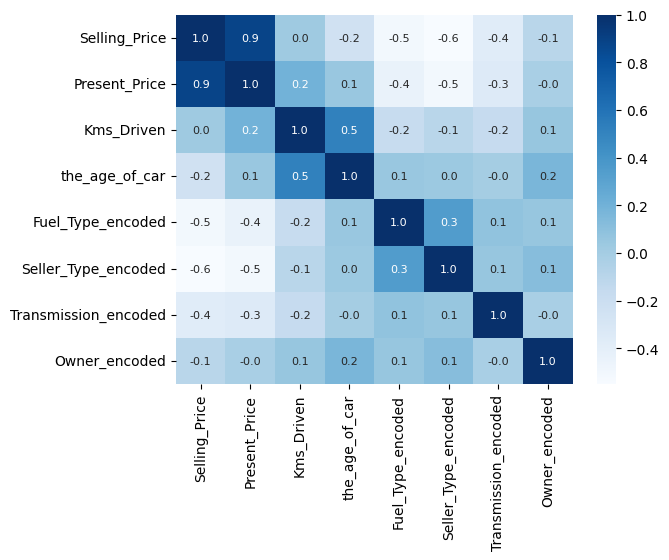

In [24]:
sns.heatmap(data=data_1.corr().round(2) ,cbar = True , fmt = ".1f", annot_kws={'size':8} , annot=True , cmap = "Blues");

In [25]:
X = data.drop(columns = ['Car_Name','Selling_Price'],axis = 1)
y = data["Selling_Price"]

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.33 , random_state=42)

In [27]:
X_train

,Present_Price,Kms_Driven,the_age_of_car,Fuel_Type_encoded,Seller_Type_encoded,Transmission_encoded,Owner_encoded
16,10.79,41678,9,1,0,1,0
125,1.75,40000,15,2,1,1,0
287,7.50,44000,9,2,0,0,0
271,10.00,69562,15,2,0,1,0
67,20.45,59000,14,1,0,1,0
...,...,...,...,...,...,...,...
188,0.57,18000,11,2,1,1,0
71,12.48,45000,13,1,0,1,0
106,3.45,16500,10,2,1,1,1
270,10.00,69341,13,2,0,1,0


In [28]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [29]:
X_test_scaled = sc.transform(X_test)

In [30]:
lin_reg  = LinearRegression()

In [31]:
lin_reg.fit(X_train_scaled , y_train)

LinearRegression()

In [32]:
y_pred = lin_reg.predict(X_test_scaled)

In [33]:
error_score = metrics.r2_score(y_test,y_pred)
print("R squared Error :",error_score)

R squared Error : 0.8578069925756905


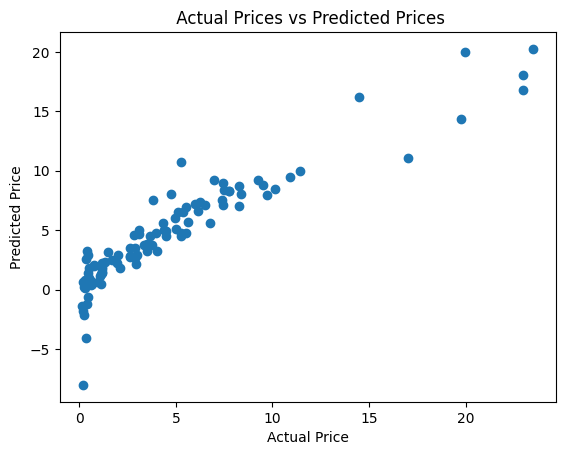

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [35]:
lasso_reg = Lasso(alpha=0.1)

In [36]:
lasso_reg.fit(X_train_scaled,y_train)

Lasso(alpha=0.1)

In [37]:
y_pred_lasso = lasso_reg.predict(X_test_scaled)

In [38]:
error_score_2 = metrics.r2_score(y_test,y_pred_lasso)
print("R squared Error :" , error_score_2)

R squared Error : 0.8647795106552962


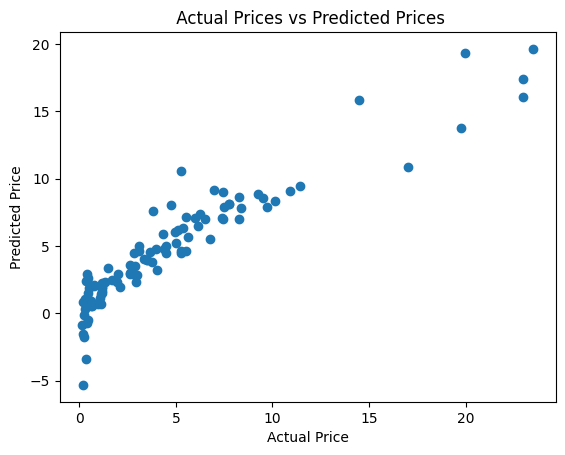

In [39]:
plt.scatter(y_test,y_pred_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()